# Proyecto Final Analítica de Datos
_Jose Manuel Ossorio, Marco Antonio Pérez, Javier Andrés Torres_

El objetivo estratégico definido por la dirección es: </br>
_"Mantener y fidelizar a nuestros clientes por medio de un servicio
 de calidad que se adapte a sus necesidades particulares"_

## Limpieza y EDA

Primero cargamos las librearías necesarias.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Ahora, cargamos el dataset haciendo uso de pandas:

In [2]:
df = pd.read_csv('PF-DatosTelco.csv')

Con el dataset cargado, hacemos una visualización de los primeros
datos para asegurar que la importación fue satisfactoria.
</br>
Primeros:

In [3]:
df.head()

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,VINCULADO,4074840,8.830000e+08,1444153.0,26,2.3,11.167542,20.3,1.762872
1,VINCULADO,8574088,1.745000e+09,2157661.0,23,3.7,0.000000,53.5,3.361266
2,RETIRADO,795993,9.500000e+07,452809.0,38,16.8,350.610224,13.9,8.359438
3,RETIRADO,8115015,8.300000e+07,2617184.0,37,17.6,230.913888,45.7,8.964017
4,RETIRADO,8187499,6.770000e+08,666069.0,19,0.0,131.541983,67.2,8.808206


Cambiamos los valores de ESTADO por sus correspondientes valores
numéricos pero de tipo string pues sigue siendo una variable categórica:

In [21]:
estados = dict(zip(['RETIRADO','VINCULADO'],[0,1]))
estados2 = {
    '0': 'RETIRADO',
    '1': 'VINCULADO'
}
df = df.replace(to_replace=estados)
df['ESTADO'] = df['ESTADO'].astype(int).astype('str')

Ahora, revisamos el dataframe haciendo uso del método info()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23162 entries, 0 to 23161
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ESTADO              23162 non-null  object 
 1   INGRESOS            23162 non-null  int64  
 2   CASA                23162 non-null  float64
 3   PRECIO_DISPOSITIVO  23162 non-null  float64
 4   MESES               23162 non-null  int64  
 5   DURACION            23162 non-null  float64
 6   SOBRECARGO          23162 non-null  float64
 7   SALDO_RESTANTE      23162 non-null  float64
 8   SATISFACCION        23162 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.6+ MB


Notamos que: </br>
- Tenemos 23162 datos
- No hay datos faltantes, pues todas las variables tienen la misma
cantidad de datos.
- Tenemos 8 variables independientes, cuyos tipos son float64 (6) e
int64 (2).
- Tenemos una variable dependiente cuyo tipo de dato es object (string)

Ahora, realizamos la visualización de estadísticos para una comprensión
básica del dataframe.

In [23]:
df.describe(include='all')

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
count,23162,2.316200e+04,2.316200e+04,2.316200e+04,23162.000000,23162.000000,23162.000000,23162.000000,23162.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,11665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.813115e+06,7.161435e+08,1.315340e+06,24.197133,9.609852,110.056296,42.991888,5.480840
std,NaN,2.737374e+06,4.811551e+08,7.485700e+05,14.264014,7.040007,100.771503,30.204540,2.809938
min,NaN,1.500000e+05,8.000000e+07,2.000000e+05,0.000000,0.000000,0.000000,0.000000,0.613580
25%,NaN,2.156296e+06,3.570000e+08,6.571840e+05,14.000000,2.100000,12.566883,15.200000,2.705504
50%,NaN,6.137553e+06,6.240000e+08,1.237456e+06,24.000000,14.600000,75.383640,37.650000,4.064550
75%,NaN,7.347180e+06,9.077500e+08,1.829581e+06,34.000000,16.100000,201.550049,70.000000,8.268244


Reconocemos que: </br>
- Meses, duración, sobrecargo, saldo restante y satisfacción tienen
valores mucho menores que aquellos de ingresos, casa y precio
dispositivo.
- Al comparar las medias con el percentil 50%, podemos notar que: </br>
    - ingresos, casa, duración, sobrecargo, saldo restante y satisfacción
  presentan diferencias importantes.
- Tenemos que los valores de la variable dependiente son solamente dos
y que estos no están balanceados pues tenemos que la clase más
representativa es RETIRADO con 11665 entradas.

## Visualización
Con un diagrama de barras, vemos la distribución de la clase estado:

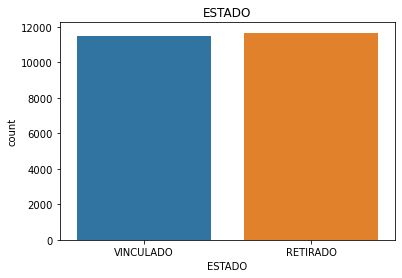

In [7]:
fig, ax = plt.subplots()
sns.countplot(x=df.columns[0], data=df)
plt.title(df.columns[0])
ax.set_xticklabels(['VINCULADO', 'RETIRADO'])
plt.show()

Ahora, analizamos las variables independientes a partir de boxplots.

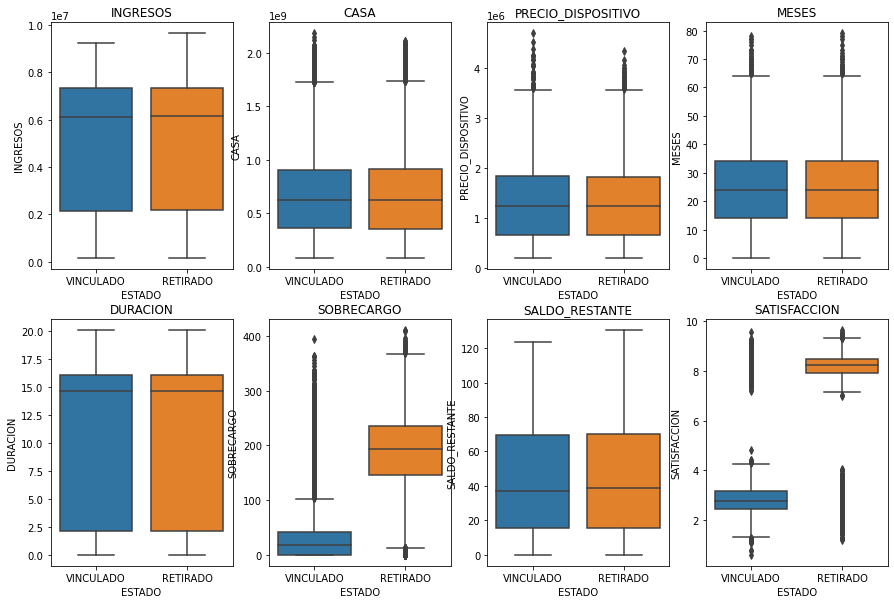

In [8]:
fig = plt.figure(figsize=(15,10))
i = 1
for var_num in df.columns[1:]:
    ax = fig.add_subplot(2,4,i)
    sns.boxplot(x=df.columns[0], y=var_num, data=df)
    plt.title(var_num)
    ax.set_xticklabels(['VINCULADO', 'RETIRADO'])
    i += 1

Aunque a primera vista podríamos considerar cómo "verdaderos" outliers
a los valores dados por los boxplots, recordamos la interpretación
de los cuartiles y las medias. Consideramos entonces los siguientes
diagramas de violin:


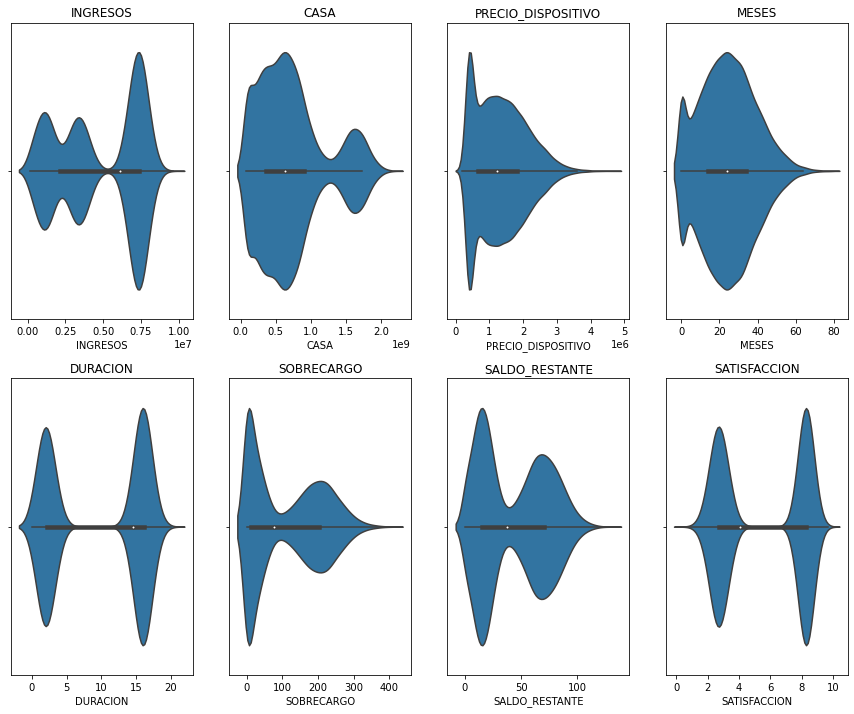

In [9]:
fig = plt.figure(figsize=(15,12))
i = 1

for var_num in df.columns[1:]:
    ax = fig.add_subplot(2,4,i)
    sns.violinplot(x=var_num, data=df)
    plt.title(var_num)
    i += 1

Ahora, con un pairplot podemos realizar análisis univariado y
bivariado:

<Figure size 1080x1080 with 0 Axes>

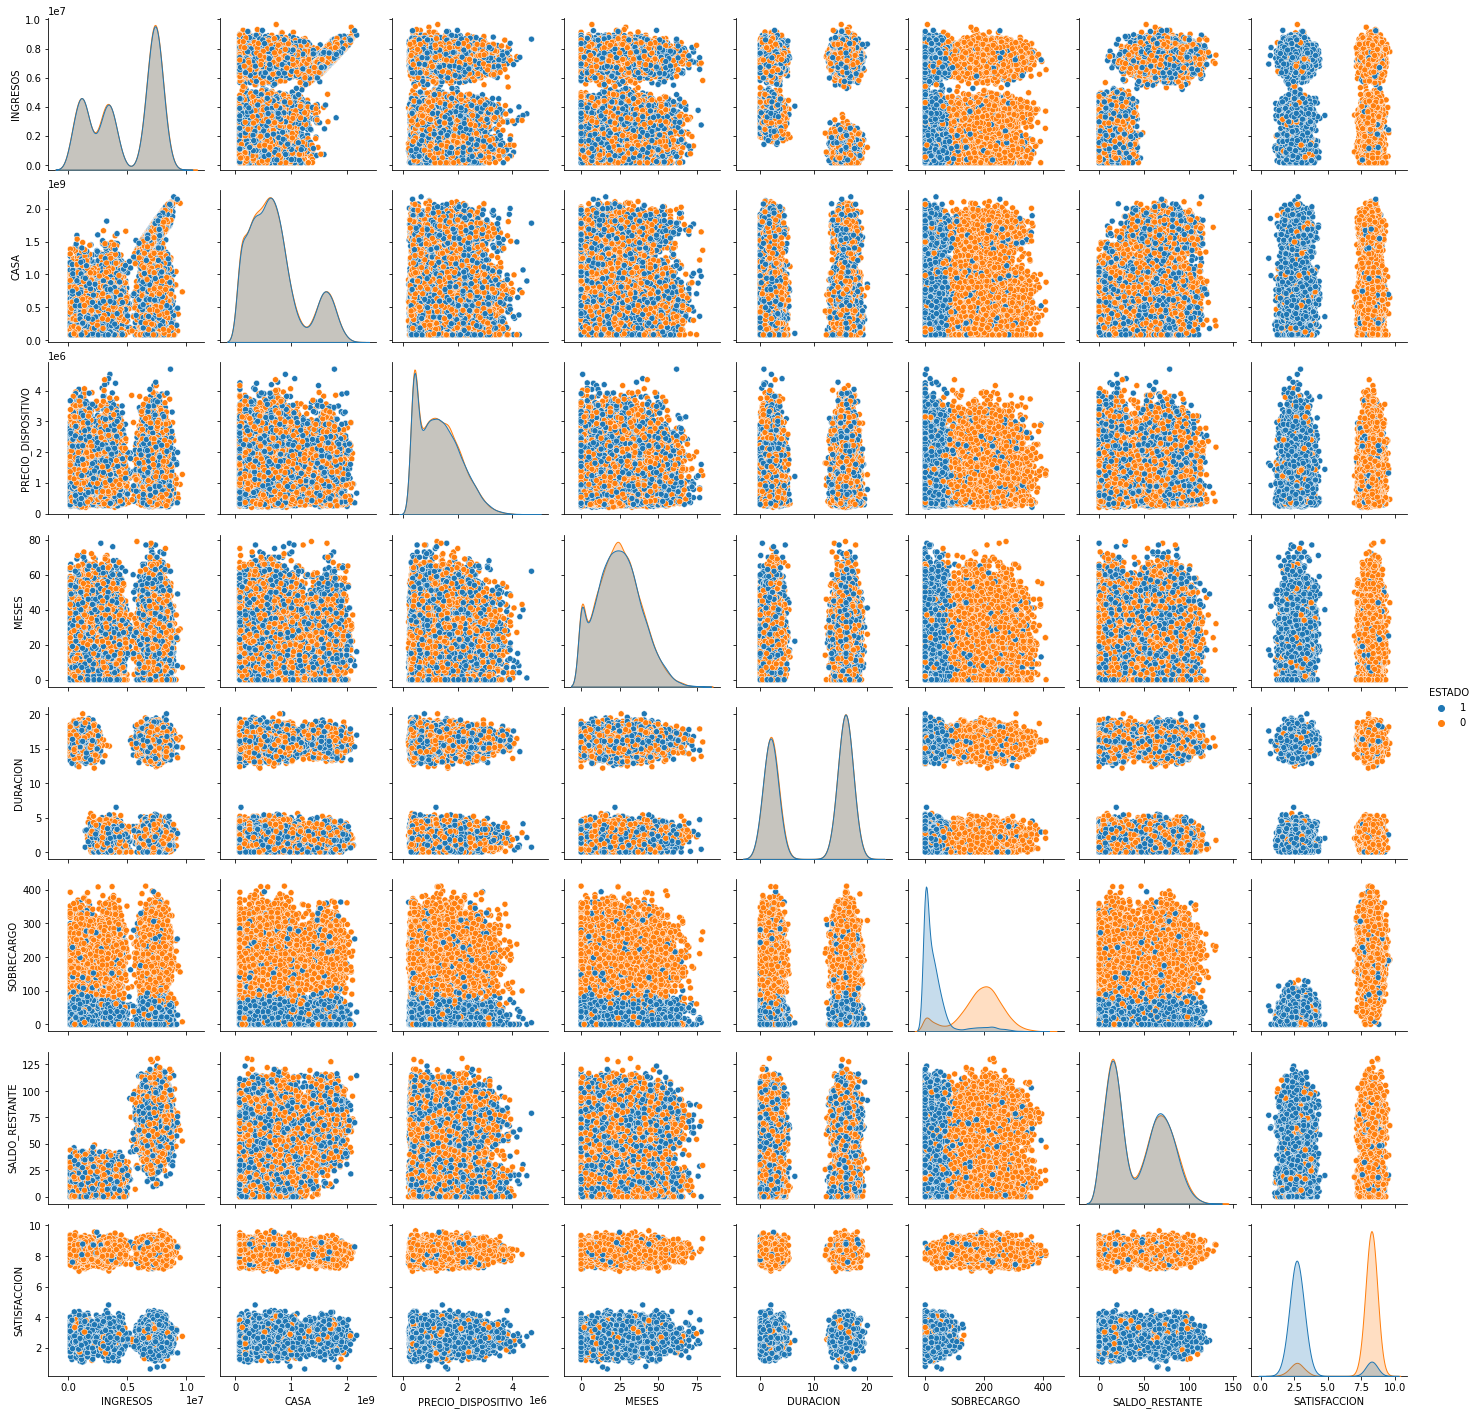

In [12]:
plt.figure(figsize=(15,15))
ax = sns.pairplot(df, hue='ESTADO')

Notamos un posible error a la hora de nombrar o
definir la escala para la variable satisfacción. Esto porque según
las gráficas, se interpretaría que los usuarios que más se retiran
tiene en promedio mayor satisfacción, lo cuál es contraintuitivo. Es
probable que el nombre de la variable sea _insatisfacción_.</br>
Notamos, además, que las variables satisfacción y sobrecargo son las únicas
que permiten una (o mayormente una) clara distinción entre vinculado
y retirado. Esto nos indica que el valor predictivo de estas dos
variables es mayor que el de las otras, pero es necesario revisar
la posibilidad de una correlación entre las mismas.</br>
Ahora, para corroborar numéricamente la correlación entre las
variables, usamos el método corr():

In [25]:
df['ESTADO_NUMERICO'] = df['ESTADO'].factorize()[0]
df.corr()

,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION,ESTADO_NUMERICO
INGRESOS,1.000000,0.384504,-0.006743,-0.005581,-0.158168,-0.000683,0.844898,0.002585,0.001584
CASA,0.384504,1.000000,0.002072,-0.002583,-0.063850,0.003101,0.326638,0.002311,-0.001066
PRECIO_DISPOSITIVO,-0.006743,0.002072,1.000000,-0.000815,0.010783,0.004415,-0.004306,-0.000814,-0.002907
MESES,-0.005581,-0.002583,-0.000815,1.000000,0.006929,0.004622,-0.003475,0.002688,-0.001977
DURACION,-0.158168,-0.063850,0.010783,0.006929,1.000000,0.002041,0.046902,0.001023,0.000076
SOBRECARGO,-0.000683,0.003101,0.004415,0.004622,0.002041,1.000000,0.002448,0.889798,0.731439
SALDO_RESTANTE,0.844898,0.326638,-0.004306,-0.003475,0.046902,0.002448,1.000000,0.004315,0.004029
SATISFACCION,0.002585,0.002311,-0.000814,0.002688,0.001023,0.889798,0.004315,1.000000,0.801472
ESTADO_NUMERICO,0.001584,-0.001066,-0.002907,-0.001977,0.000076,0.731439,0.004029,0.801472,1.000000


Primero, creamos una columna nueva llamada ESTADO_NUMERICO que
contiene los valores en enteros de la columna ESTADO. Esto nos
permite calcular la correlación con la variable dependiente pues
sus valores ya no serían categóricos. </br>
Confirmamos con esta table qué:</br>
- Los valores de correlación con estado son mayores para satisfacción
y sobrecargo (0.8 y 0.73 respectivamente).
- Existe mayor correlación entre las dos variables independientes
(0.889) lo cuál deberá ser tenido en cuenta al realizar el modelo.